In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
def plot_bar(ax, df, label_col, data_col, x_label, y_label, title):
    bar = sns.barplot(x=label_col, y=data_col, data=df, ax=ax)
    bar.set(xlabel=x_label, ylabel=y_label)
    ax.set_title(title)
    
    # add top bar labels
    duration = ["{:.0f}".format(dur) for dur in list(df[data_col])]
    _ = ax.bar_label(bar.containers[0], duration)

In [3]:
def parallel_speed_up(durs):
    seq_dur = durs[0]
    speed_up = []
    
    for dur in durs:
        speed_up.append(seq_dur/dur)
        
    return speed_up

In [4]:
durs = [
    554,
    106,
    31,
    25
]

labels = [
    "no-optim",
    "vectorized",
    "parallel-assign",
    "parallel-compute"
]

In [5]:
speed_ups = parallel_speed_up(durs)

In [6]:
dur_col = "time[ms]"
speed_up_col = "speed up"
label_col = "labels"
df = pd.DataFrame(list(zip(durs, speed_ups, labels)), columns=[dur_col, speed_up_col, label_col])

In [7]:
df

,time[ms],speed up,labels
0,554,1.000000,no-optim
1,106,5.226415,vectorized
2,31,17.870968,parallel-assign
3,25,22.160000,parallel-compute


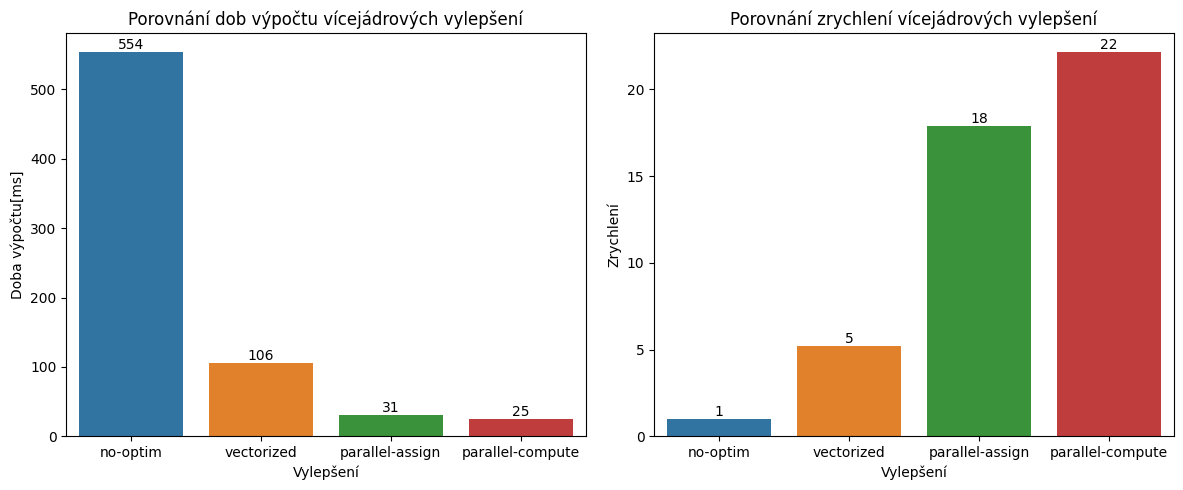

In [9]:
y_label = "Vylepšení"
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plot_bar(axs[0], df, label_col, dur_col, y_label, "Doba výpočtu[ms]",
         "Porovnání dob výpočtu vícejádrových vylepšení")
plot_bar(axs[1], df, label_col, speed_up_col, y_label, "Zrychlení",
         "Porovnání zrychlení vícejádrových vylepšení")
fig.tight_layout()
# plt.savefig("graphs/optims.png", dpi=400)